In [1]:
from PIL import Image
import argparse
import matplotlib.pyplot as plt
import sys
import random
import numpy as np
import os

import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary

import bqplot.scales
import ipyvolume as ipv
import ipywidgets as widgets

from dataloader import PreprocessedDataset, rsplit
from dataloader import visualize_labeled_array3d, plot_tensor2d, plot_voxel3d
import dsocc
import loss
import STTR_Loader

from loss import geo_scal_loss, sem_scal_loss, CE_ssc_loss, one_hot_encoding

import warnings
warnings.filterwarnings('ignore')



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

#device = 'cpu'
print(device)


cuda:0


In [2]:
batch_size = 3

In [3]:
train_set = PreprocessedDataset('../preprocessed_data/preprocessed_999_1.h5')
len(train_set)

999

In [4]:
test_set = PreprocessedDataset('../preprocessed_data/preprocessed_500_10.h5')
len(test_set)

500

In [5]:
test_set.class_names

['empty',
 'vehicles',
 'building',
 'road',
 'sidewalk',
 'vegetation',
 'others',
 'unknown']

In [6]:
from dsocc import DepthSegLift_OCC, instantiate_dsocc, inference

num_classes = train_set.num_classes
sttr_weight_path = '/workspace/PretrainedWeights/kitti_finetuned_model.pth.tar'

model = instantiate_dsocc(sttr_weight_path, num_classes, device)

Pre-trained model successfully loaded.
[STTR]Number of parameters (in millions): 2.513811 M
[SegFormer]Number of parameters (in millions): 84.607955 M
[DSOCC]Number of parameters (in millions): 137.068223 M
[DSOCC]Number of trainable parameters (in millions): 49.946457 M


In [7]:
model.load_state_dict(torch.load('../Experiments/checkpoints/dsocc_7_39and11.pth', map_location=device))

<All keys matched successfully>

In [14]:
left_img, right_img, gt = test_set.get_batched_data(random.randint(0, len(test_set)-1))

pred = inference(model, left_img, right_img, gt, device)

In [15]:
pred.shape

torch.Size([1, 64, 64, 8])

In [16]:
gt.shape

torch.Size([1, 64, 64, 8])

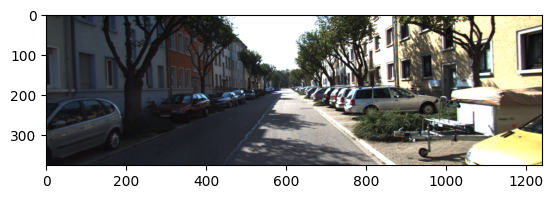

In [17]:
plot_tensor2d(left_img.squeeze(0))

In [18]:
plot_voxel3d(pred, shape=(64, 64, 8), size=2)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [19]:
plot_voxel3d(gt, shape=(64, 64, 8), size=2)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…